<a href="https://colab.research.google.com/github/buildwithadi/tensorFlowForML/blob/courseProjects/celsiusToFahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

In [ ]:
celsius_q = np.array([-40,-10,0,8,15,22,38],dtype=float)
fahrenheit_a = np.array([-40,14,32,46,59,72,100], dtype=float)

for i,c in enumerate(celsius_q):
    print("{} degrees celsius = {} degrees fahrenheit".format(c,fahrenheit_a[i]))

-40.0 degrees celsius = -40.0 degrees fahrenheit
-10.0 degrees celsius = 14.0 degrees fahrenheit
0.0 degrees celsius = 32.0 degrees fahrenheit
8.0 degrees celsius = 46.0 degrees fahrenheit
15.0 degrees celsius = 59.0 degrees fahrenheit
22.0 degrees celsius = 72.0 degrees fahrenheit
38.0 degrees celsius = 100.0 degrees fahrenheit


## **Some Machine Learning terminology**
- **Feature** - The input(s) to our model. In this case, a single value - the degrees in Celsius
- **Lables** - The output our model predicts. In this case, a single value - the degrees in Fahrenfet.
- **Training Example** - A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenhet_a at a specific index, such as (22,72)





## **Create the Model**

### **Build Model**

In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Assemble layers into the model**
Once layers are defined, they need to be assembled into a model. The sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.


In [ ]:
model = tf.keras.Sequential([l0])

### **Compile the model, with loss and optimizer functions**
Before training, the model has to be compiled. When compiled for training, the model is give:
- **Loss Function** - A way of measuring how far off predictions are from the desired outcome. (The measure of difference is called the "loss")
- **Optimizer Function** - A way of adjusting internal values in order to reduce the loss.

In [ ]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))

## **Train the Model**
Train the model by callinf the "fit" method.


In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## **Display training statistics**
The "fit" method returs a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in Fahrenheit_a


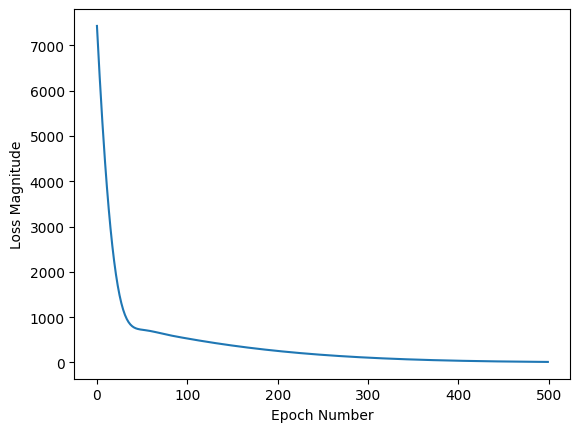

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## **Use the Model to Predict Values**


In [ ]:
print(model.predict(np.array([100.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[211.2819]]


In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8282226]], dtype=float32), array([28.45964], dtype=float32)]
